## メモ
前処理内容
- 欠損値のあるデータを削除（データ数 : 48842 => 45222）
- カテゴリカル変数を one hot encoding（特徴量数 : 15 => 105）

作成したデータは"pre_adult.csv"として保存

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('pre_adult4.csv', index_col=0)
data['marital_status'] = data['marital_status'].apply(lambda x: "single" if x == 0 else "married")
data['sex'] = data['sex'].apply(lambda x: "male" if x == 1 else "female")
data.head()

,age,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_work,label,occupation_blueCollar,occupation_other,occupation_professional,occupation_sales,occupation_whiteCollar
0,39,13,single,1,male,2174,0,40,<=50K,0,1,0,0,0
1,50,13,married,1,male,0,0,13,<=50K,0,0,0,0,1
2,38,9,married,1,male,0,0,40,<=50K,1,0,0,0,0
3,53,7,married,0,male,0,0,40,<=50K,1,0,0,0,0
4,28,13,married,0,female,0,0,40,<=50K,0,0,1,0,0


In [3]:
data['edu_num'] = data['education_num'].apply(lambda x: 1 if x <= 4 else 2 if x <= 8 else 3 if x <= 12 else 4)
data.head()

,age,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_work,label,occupation_blueCollar,occupation_other,occupation_professional,occupation_sales,occupation_whiteCollar,edu_num
0,39,13,single,1,male,2174,0,40,<=50K,0,1,0,0,0,4
1,50,13,married,1,male,0,0,13,<=50K,0,0,0,0,1,4
2,38,9,married,1,male,0,0,40,<=50K,1,0,0,0,0,3
3,53,7,married,0,male,0,0,40,<=50K,1,0,0,0,0,2
4,28,13,married,0,female,0,0,40,<=50K,0,0,1,0,0,4


In [4]:
n_data = data[["capital_gain", "capital_loss"]].copy()
n_data.head()

,capital_gain,capital_loss
0,2174,0
1,0,0
2,0,0
3,0,0
4,0,0


In [5]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
ss.fit(n_data)
data_ss = ss.transform(n_data)

df = pd.DataFrame(data_ss, columns=["capital_gain", "capital_loss"])
df["label"] = list(data.label)
df.head()

,capital_gain,capital_loss,label
0,0.142888,-0.21878,<=50K
1,-0.146733,-0.21878,<=50K
2,-0.146733,-0.21878,<=50K
3,-0.146733,-0.21878,<=50K
4,-0.146733,-0.21878,<=50K


In [6]:
df["gain*loss"] = df["capital_gain"] * df["capital_loss"]
df.head(20)

,capital_gain,capital_loss,label,gain*loss
0,0.142888,-0.21878,<=50K,-0.031261
1,-0.146733,-0.21878,<=50K,0.032102
2,-0.146733,-0.21878,<=50K,0.032102
3,-0.146733,-0.21878,<=50K,0.032102
4,-0.146733,-0.21878,<=50K,0.032102
5,-0.146733,-0.21878,<=50K,0.032102
6,-0.146733,-0.21878,<=50K,0.032102
7,-0.146733,-0.21878,>50K,0.032102
8,1.729546,-0.21878,>50K,-0.378390
9,0.543083,-0.21878,>50K,-0.118816


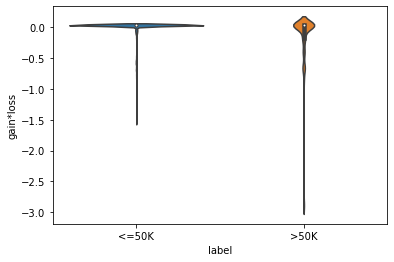

In [64]:
sns.violinplot(x="label", y="gain*loss", data=df)

[(0.0, -1.7)]

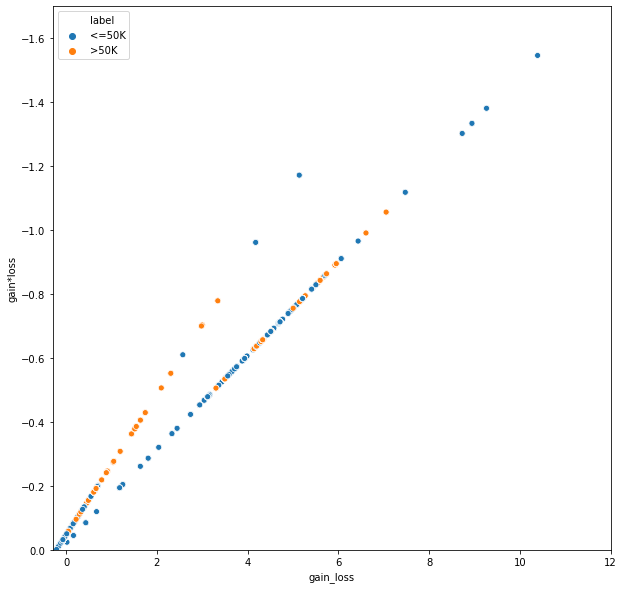

In [67]:
plt.figure(figsize=(10, 10)) 
g = sns.scatterplot(x="gain_loss", y="gain*loss", data=df, hue="label")
g.set(xlim=(-0.3, 12))
g.set(ylim=(0.0, -1.7))

In [51]:
data.head()

,age,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_work,label,occupation_blueCollar,occupation_other,occupation_professional,occupation_sales,occupation_whiteCollar
0,39,13,0,1,1,2174,0,40,<=50K,0,1,0,0,0
1,50,13,1,1,1,0,0,13,<=50K,0,0,0,0,1
2,38,9,1,1,1,0,0,40,<=50K,1,0,0,0,0
3,53,7,1,0,1,0,0,40,<=50K,1,0,0,0,0
4,28,13,1,0,0,0,0,40,<=50K,0,0,1,0,0


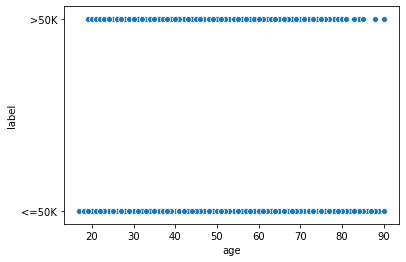

In [3]:
sns.scatterplot(x="age", y="label", data=data)

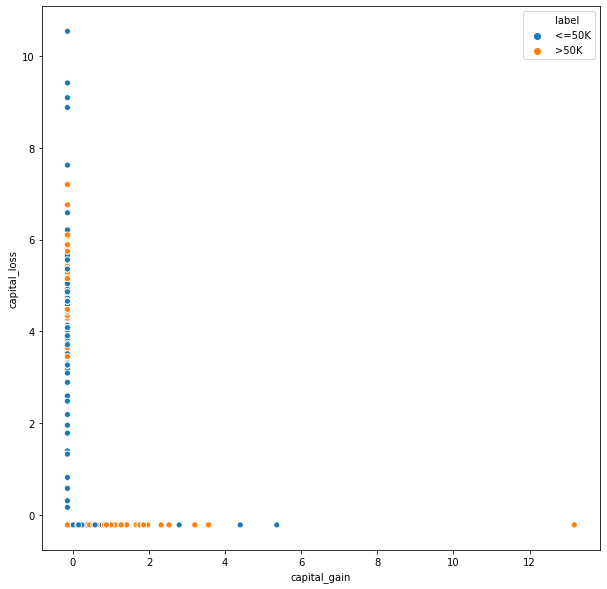

In [69]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="capital_gain", y="capital_loss", data=df, hue="label")

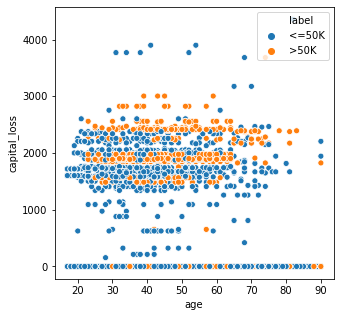

In [7]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(x="age", y="capital_loss", data=data, hue="label")

Text(0.5, 1.0, 'scatter plot of capital gain and capital loss')

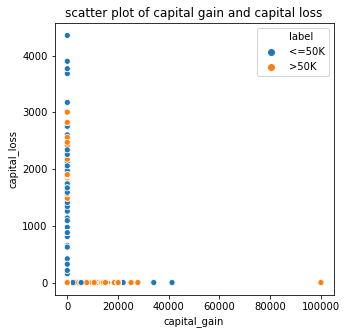

In [16]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(x="capital_gain", y="capital_loss", data=data, hue="label")
plt.title("scatter plot of capital gain and capital loss")

Text(0.5, 1.0, 'scatter plot of capital gain and capital loss')

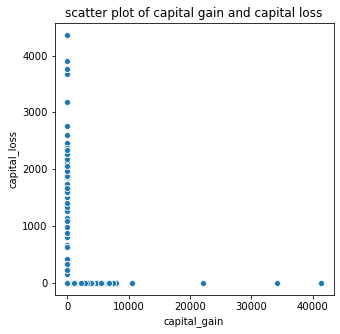

In [38]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(x="capital_gain", y="capital_loss", data=data[data["label"]=="<=50K"])
plt.title("scatter plot of capital gain and capital loss")

Text(0.5, 1.0, 'scatter plot of capital gain and capital loss')

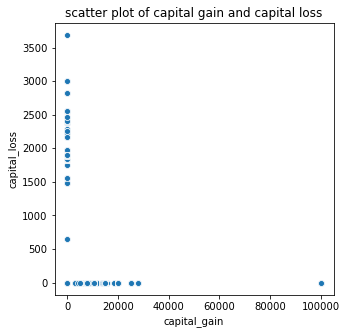

In [39]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(x="capital_gain", y="capital_loss", data=data[data["label"]==">50K"])
plt.title("scatter plot of capital gain and capital loss")

[(0, 5200)]

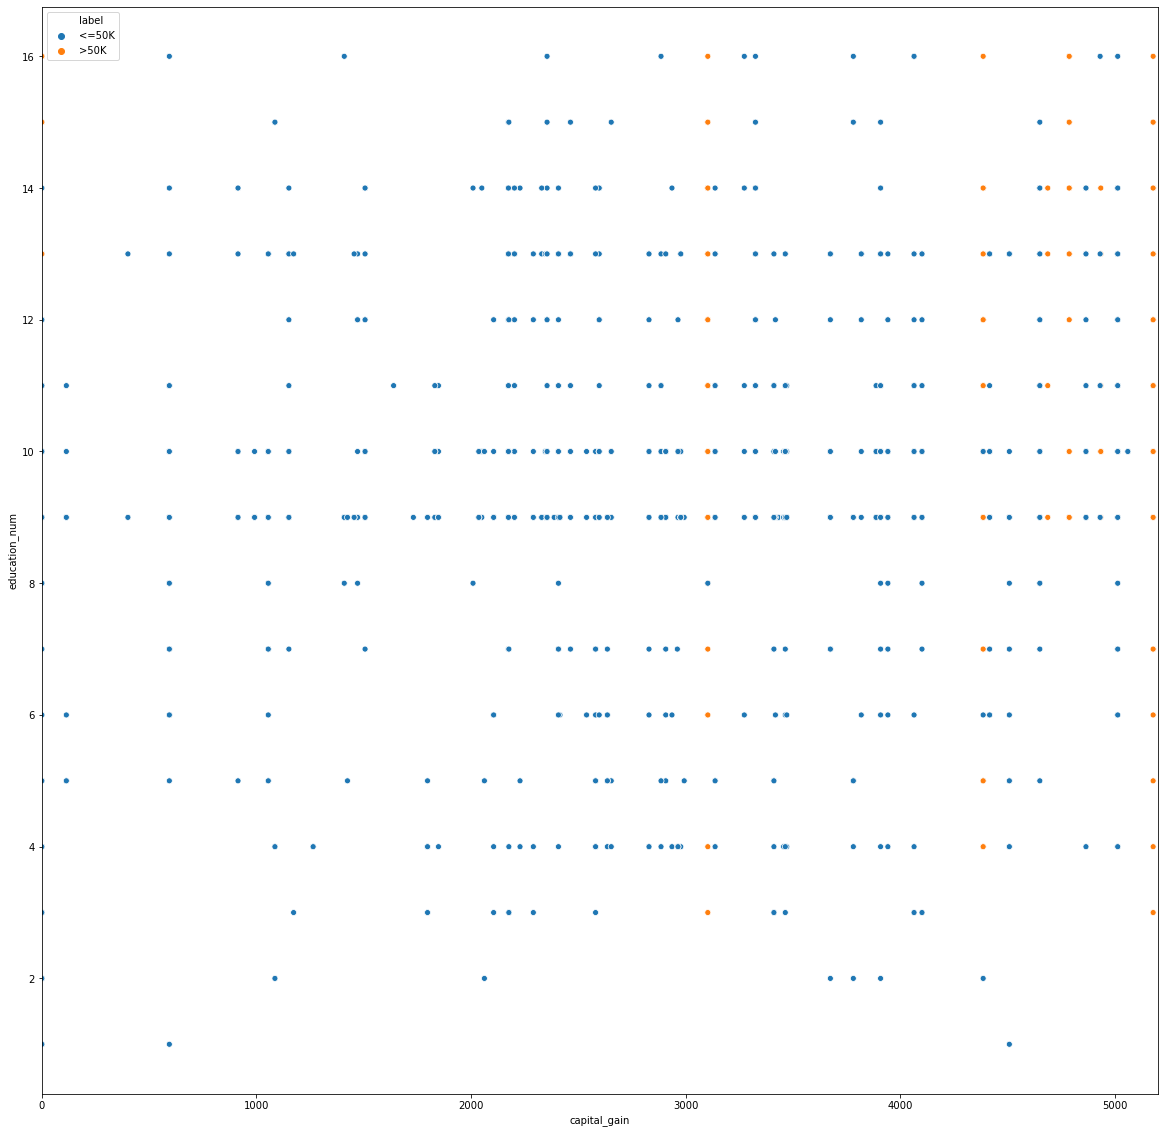

In [5]:
plt.figure(figsize=(20, 20)) 
g = sns.scatterplot(x="capital_gain", y="education_num", data=data, hue="label")
g.set(xlim=(0, 5200))

[(5200, 50000)]

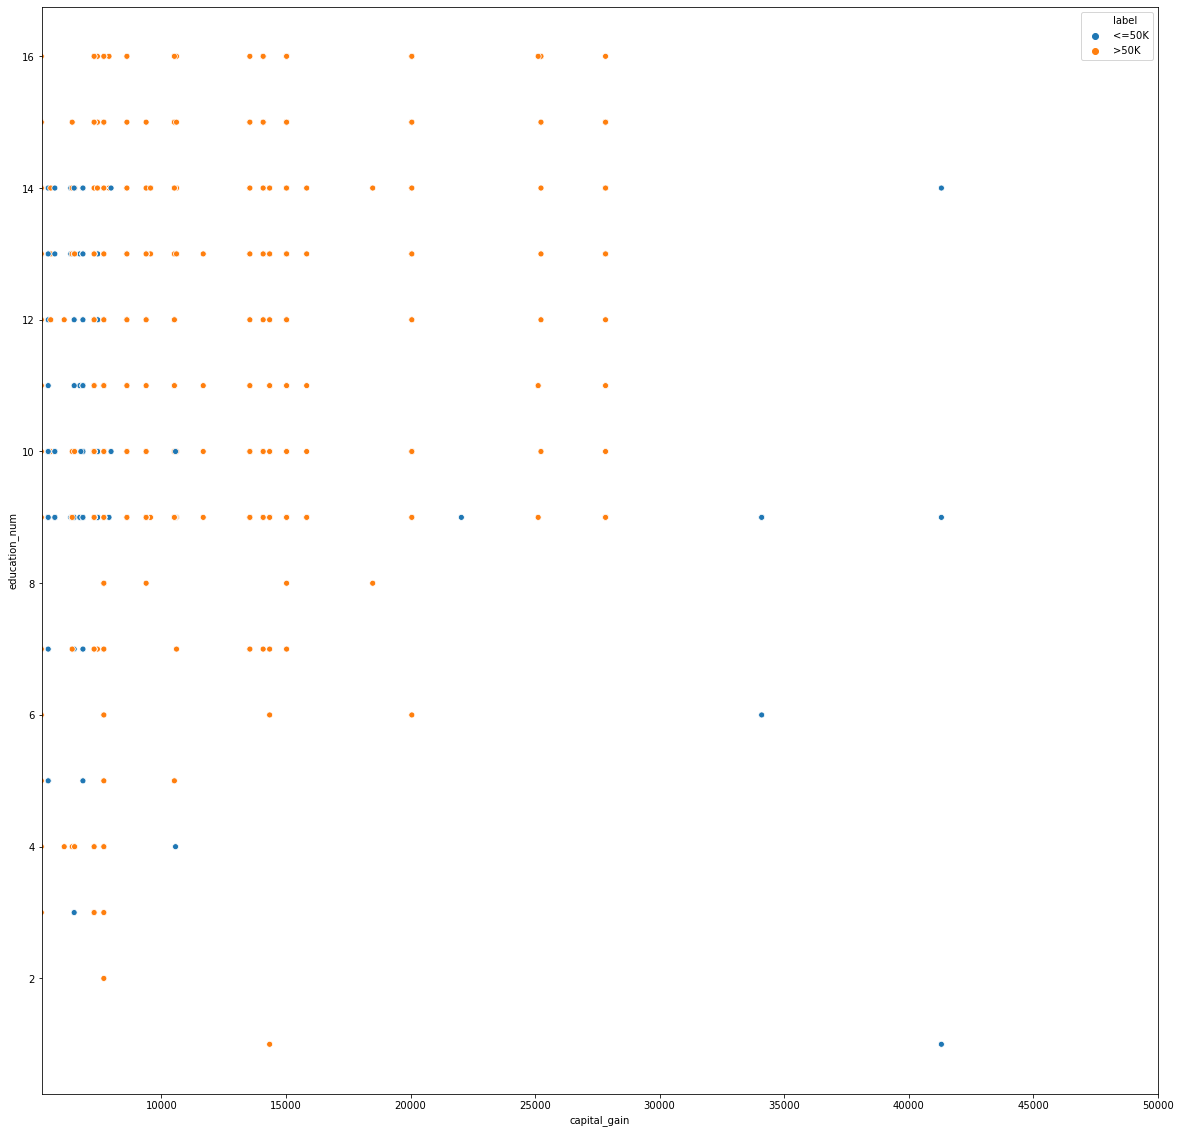

In [6]:
plt.figure(figsize=(20, 20)) 
g = sns.scatterplot(x="capital_gain", y="education_num", data=data, hue="label")
g.set(xlim=(5200, 50000))

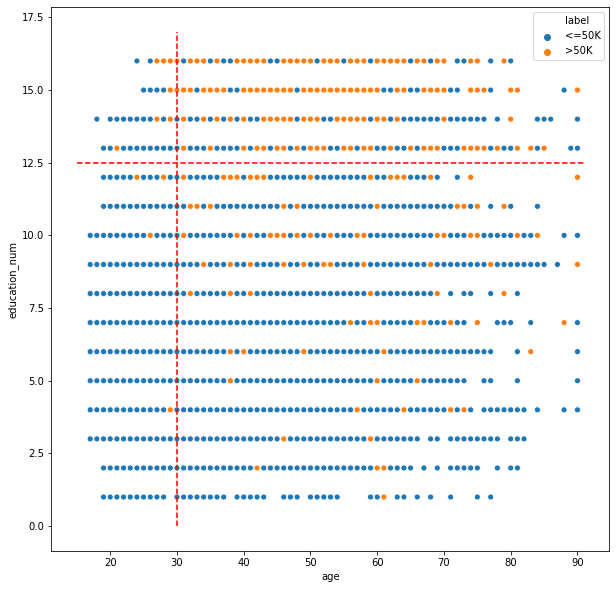

In [7]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="age", y="education_num", data=data, hue="label")
plt.vlines(30, 0, 17, "red", linestyle='dashed', linewidth=1.5)
plt.hlines(12.5, 15, 91, "red", linestyle='dashed', linewidth=1.5)

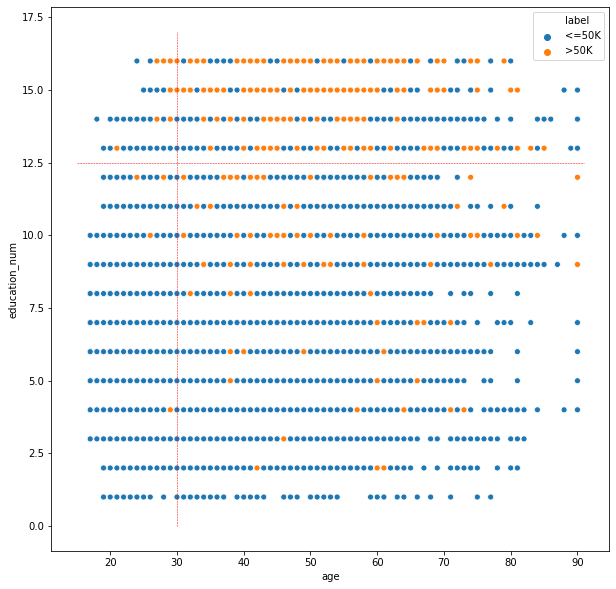

In [8]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="age", y="education_num", data=data[data["capital_gain"]<5119.0], hue="label")
plt.vlines(30, 0, 17, "red", linestyle='dashed', linewidth=0.5)
plt.hlines(12.5, 15, 91, "red", linestyle='dashed', linewidth=0.5)

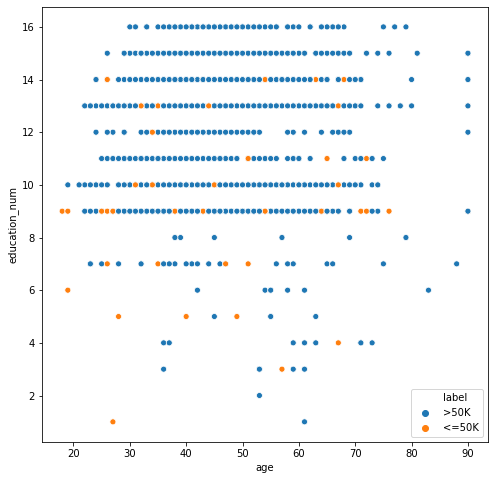

In [9]:
plt.figure(figsize=(8, 8)) 
sns.scatterplot(x="age", y="education_num", data=data[data["capital_gain"]>=5119.0], hue="label")

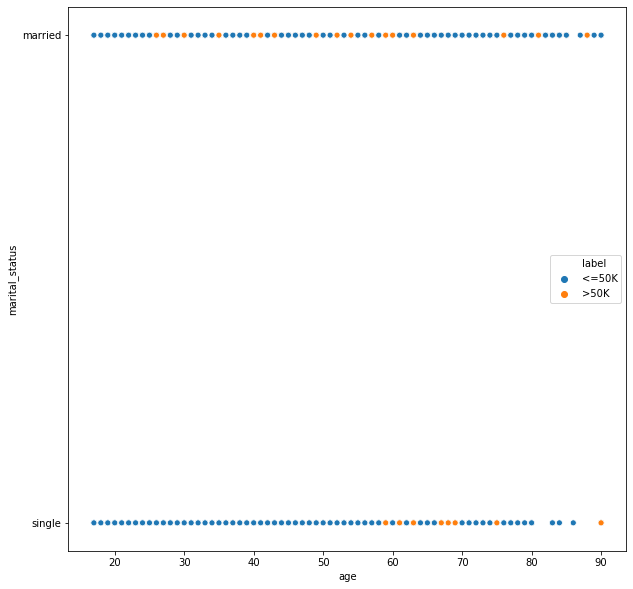

In [13]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="age", y="marital_status", data=data, hue="label")

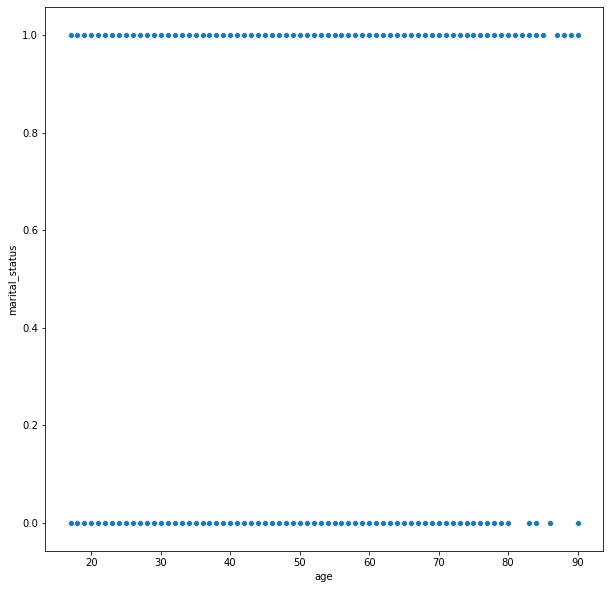

In [11]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="age", y="marital_status", data=data[data["label"]=="<=50K"])

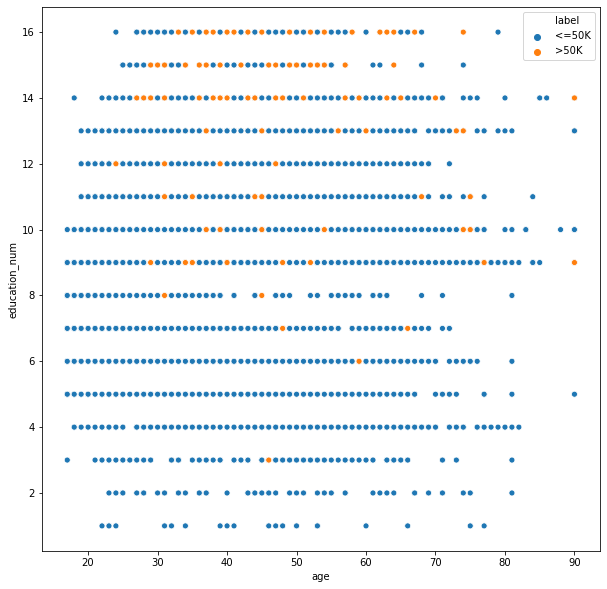

In [12]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="age", y="education_num", data=data[data["sex"]==0], hue="label")

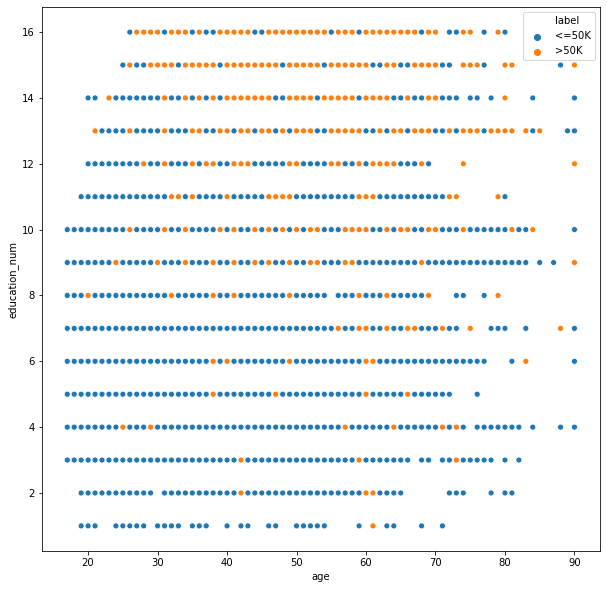

In [13]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x="age", y="education_num", data=data[data["sex"]==1], hue="label")

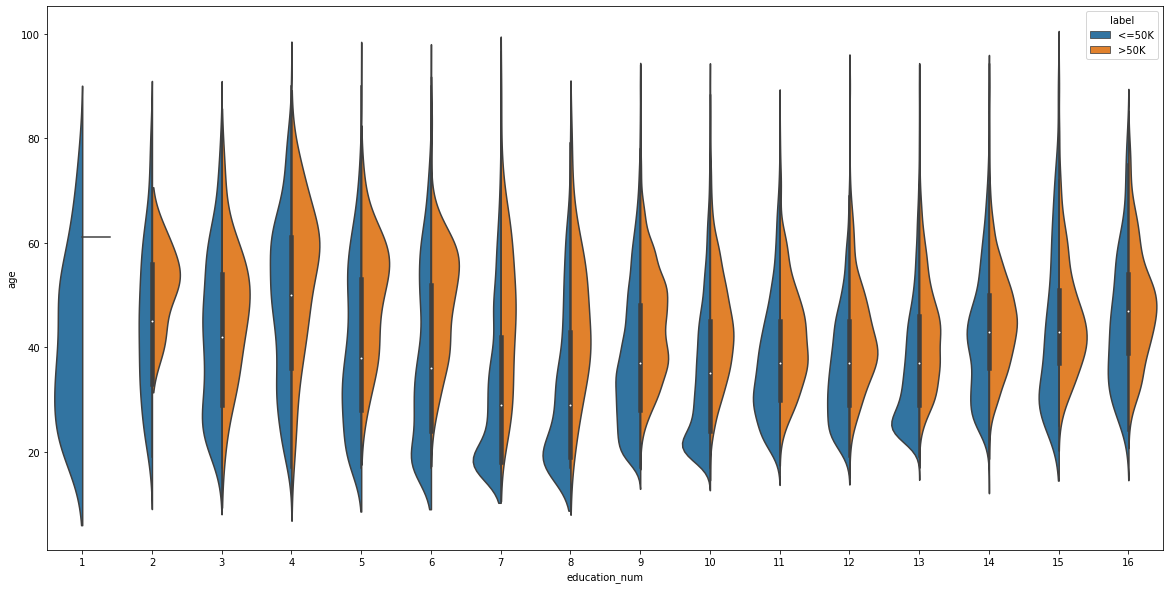

In [55]:
plt.figure(figsize=(20, 10)) 
sns.violinplot(x="education_num", y="age", data=data, hue="label", split=True)

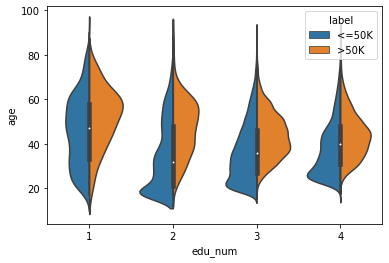

In [34]:
sns.violinplot(x="edu_num", y="age", data=data, hue="label", split=True)

Text(0.5, 1.0, 'violin plot of age and edu_num')

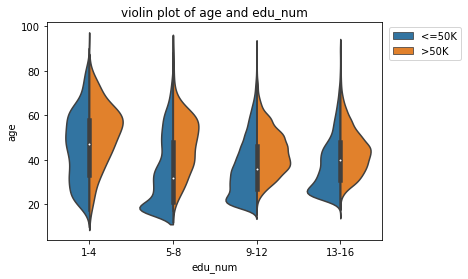

In [37]:

sns.violinplot(x="edu_num", y="age", data=data, hue="label", split=True)
plt.xticks([0, 1, 2, 3], [ "1-4", "5-8", "9-12", "13-16"])
plt.legend(bbox_to_anchor=(1.25, 1.0))
plt.title("violin plot of age and edu_num")

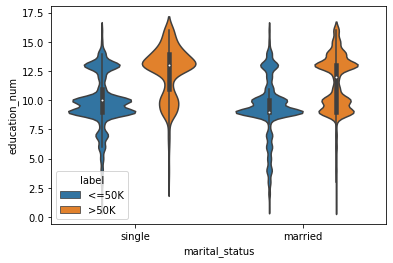

In [10]:
sns.violinplot(x="marital_status", y="education_num", data=data, hue="label")

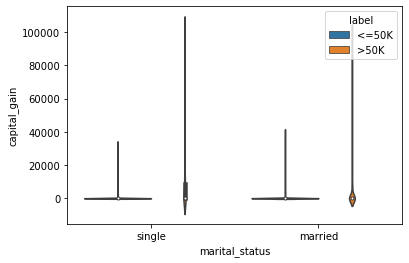

In [8]:
sns.violinplot(x="marital_status", y="capital_gain", data=data, hue="label")

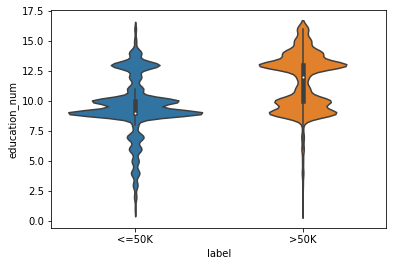

In [19]:
sns.violinplot(x="label", y="education_num", data=data)

Text(0.5, 1.0, 'violin plot of age and marital status')

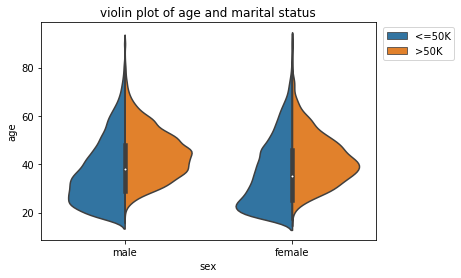

In [19]:
sns.violinplot(x="sex", y="age", data=data, hue="label", split=True)
plt.legend(bbox_to_anchor=(1.25, 1.0))
plt.title("violin plot of age and marital status")

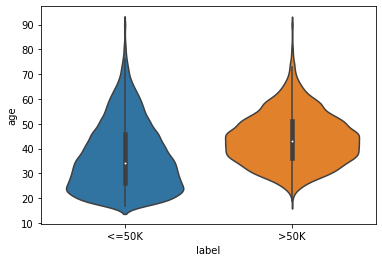

In [21]:
sns.violinplot(x="label", y="age", data=data)
#plt.title("violin plot of age and marital status")

Text(0.5, 1.0, 'violin plot of age and marital status')

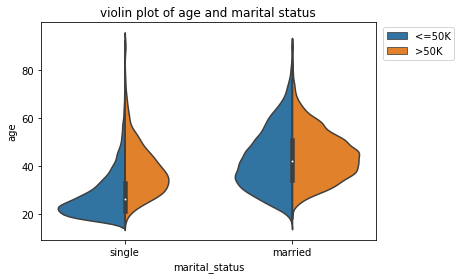

In [8]:
sns.violinplot(x="marital_status", y="age", data=data, hue="label", split=True)
plt.legend(bbox_to_anchor=(1.25, 1.0))
plt.title("violin plot of age and marital status")

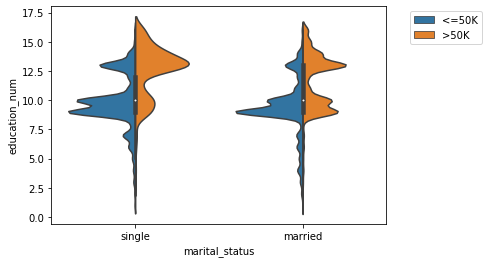

In [18]:
sns.violinplot(x="marital_status", y="education_num", hue="label", data=data, split=True)
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper right')
#plt.hlines(11.8, -0.5, 1.5, "red", linestyle='dashed', linewidth=1.5)

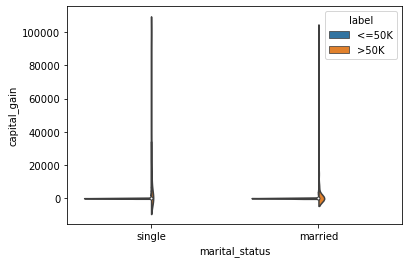

In [24]:
sns.violinplot(x="marital_status", y="capital_gain", hue="label", data=data, split=True)

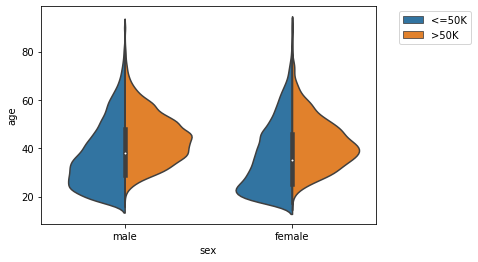

In [9]:
sns.violinplot(x="sex", y="age", hue="label", data=data, split=True)
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper right')

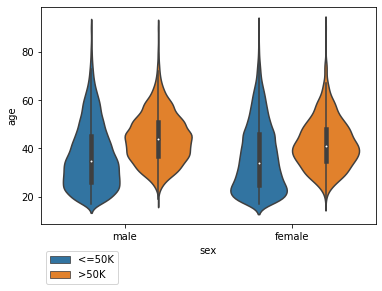

In [12]:
sns.violinplot(x="sex", y="age", hue="label", data=data)
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left')

In [13]:
data["gain_loss"] = data["capital_gain"] + data["capital_loss"]

[(0, 45000)]

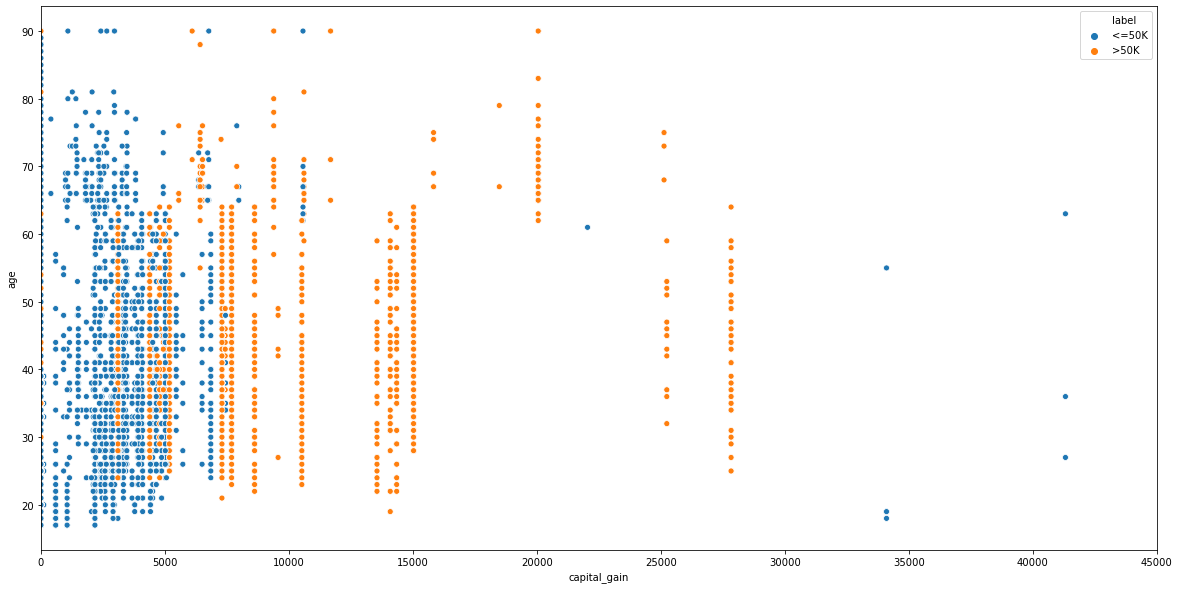

In [21]:
plt.figure(figsize=(20, 10)) 
g = sns.scatterplot(x="capital_gain", y="age", data=data, hue="label")
g.set(xlim=(0, 45000))

[(0, 5000)]

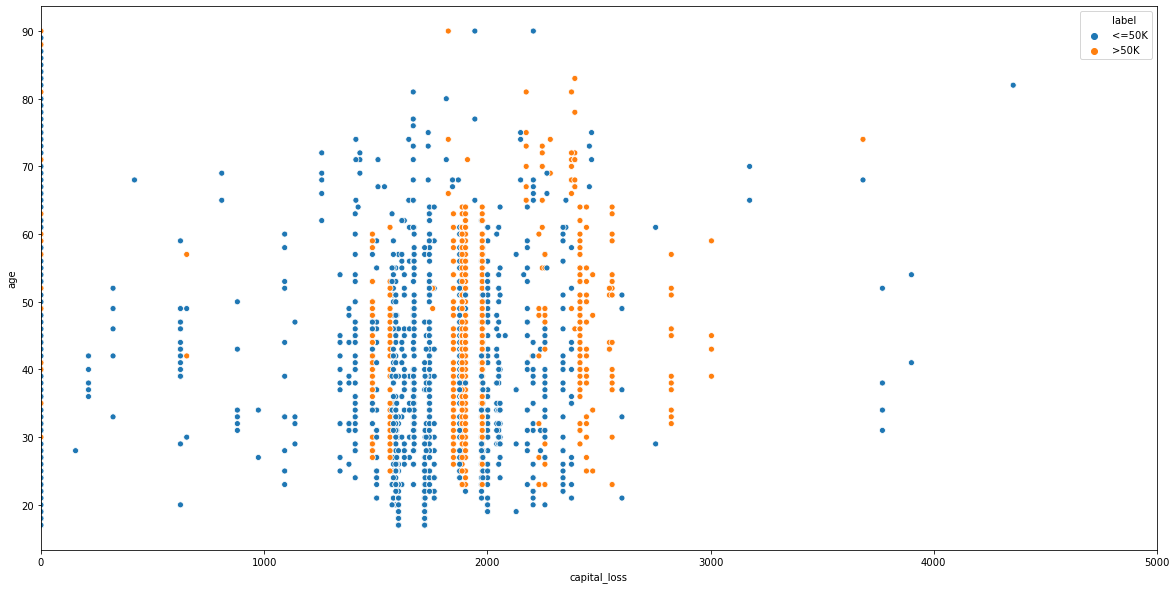

In [23]:
plt.figure(figsize=(20, 10)) 
g = sns.scatterplot(x="capital_loss", y="age", data=data, hue="label")
g.set(xlim=(0, 5000))

[(0, 45000)]

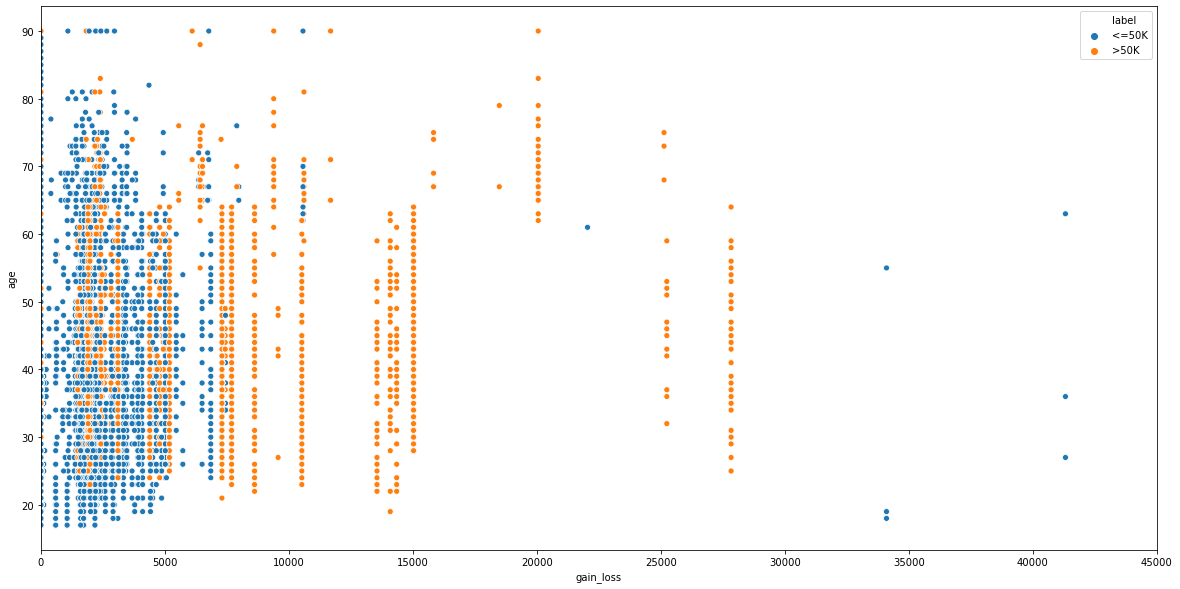

In [20]:
plt.figure(figsize=(20, 10)) 
g = sns.scatterplot(x="gain_loss", y="age", data=data, hue="label")
g.set(xlim=(0, 45000))

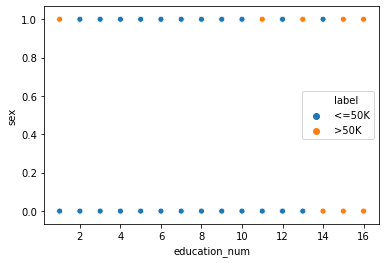

In [24]:
sns.scatterplot(x="education_num", y="sex", data=data, hue="label")

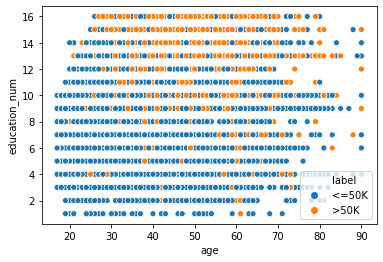

In [56]:
sns.scatterplot(x="age", y="education_num", data=new_data[new_data["sex"]==1], hue="label")

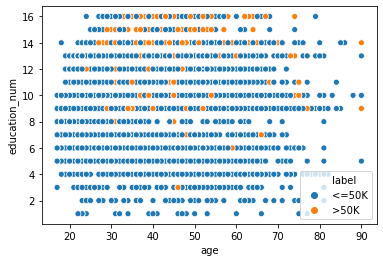

In [57]:
sns.scatterplot(x="age", y="education_num", data=new_data[new_data["sex"]==0], hue="label")

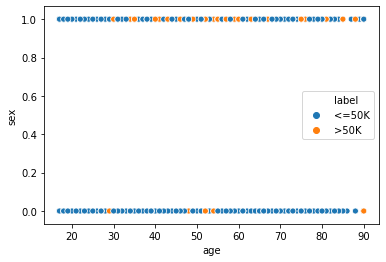

In [34]:
sns.scatterplot(x="age", y="sex", data=new_data, hue="label")

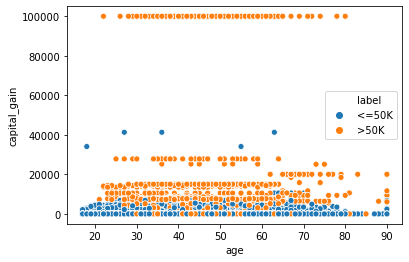

In [51]:
sns.scatterplot(x="age", y="capital_gain", data=new_data[new_data["sex"]==1], 
                hue="label")

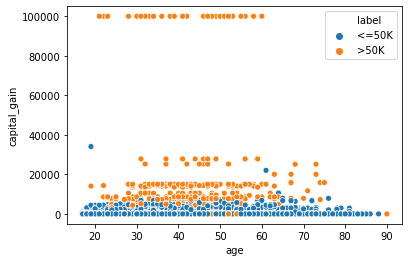

In [52]:
sns.scatterplot(x="age", y="capital_gain", data=new_data[new_data["sex"]==0], 
                hue="label")

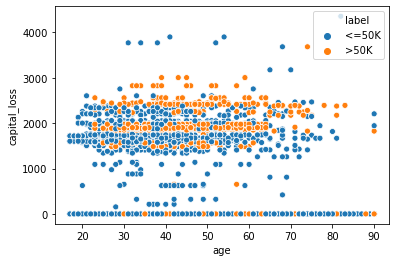

In [36]:
sns.scatterplot(x="age", y="capital_loss", data=new_data, hue="label")

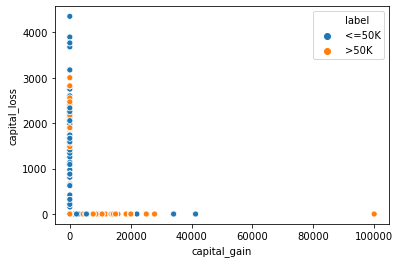

In [37]:
sns.scatterplot(x="capital_gain", y="capital_loss", data=new_data, hue="label")

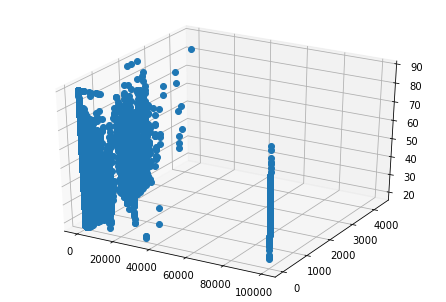

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x = new_data.capital_gain
y = new_data.capital_loss
z = new_data.age

ax.plot(x,y,z,marker="o",linestyle='None', label=new_data.label)


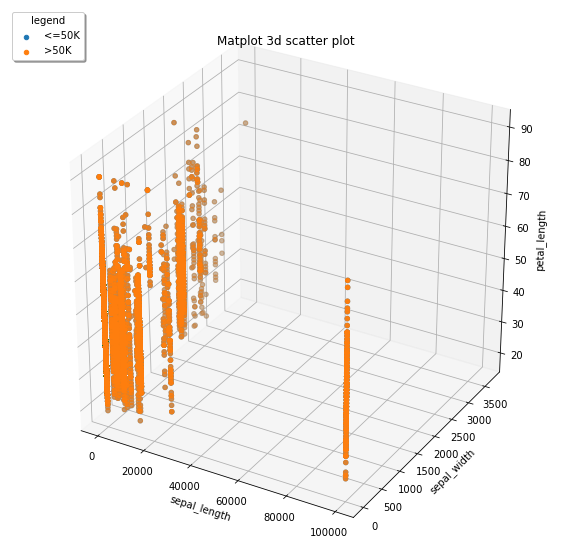

In [46]:


hue = 'label'
labels = set(new_data[hue])
dataset = []
for x in labels:
    xs = new_data[new_data[hue]==x]['capital_gain']
    ys = new_data[new_data[hue]==x]['capital_loss']
    zs = new_data[new_data[hue]==x]['age']
    dataset.append((xs, ys, zs))

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
for data, label in zip(dataset, labels):
    ax.scatter(xs, ys, zs, label=label)
    
ax.set_title('Matplot 3d scatter plot')  # タイトル
ax.set_xlabel('sepal_length')  # X軸ラベル
ax.set_ylabel('sepal_width')  # Y軸ラベル
ax.set_zlabel('petal_length')  # Z軸ラベル
ax.legend(loc=2, title='legend', shadow=True)  # 凡例

In [45]:
new_data.to_csv("pre_adult4.csv")

In [47]:
print(dataset)

[(0        2174
1           0
2           0
3           0
4           0
         ... 
16274       0
16275       0
16276       0
16278       0
16279    5455
Name: capital_gain, Length: 34014, dtype: int64, 0        0
1        0
2        0
3        0
4        0
        ..
16274    0
16275    0
16276    0
16278    0
16279    0
Name: capital_loss, Length: 34014, dtype: int64, 0        39
1        50
2        38
3        53
4        28
         ..
16274    48
16275    33
16276    39
16278    38
16279    44
Name: age, Length: 34014, dtype: int64), (7            0
8        14084
9         5178
10           0
11           0
         ...  
16252     7688
16254        0
16255        0
16261    15024
16280        0
Name: capital_gain, Length: 11208, dtype: int64, 7           0
8           0
9           0
10          0
11          0
         ... 
16252       0
16254       0
16255    1902
16261       0
16280       0
Name: capital_loss, Length: 11208, dtype: int64, 7        52
8        31
9        4

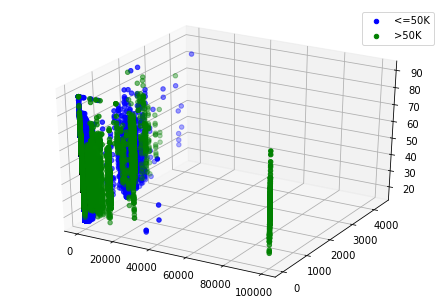

In [50]:
import matplotlib.colors as mcolors
colors = list(mcolors.BASE_COLORS.keys())

fig = plt.figure()
ax = Axes3D(fig)

labels = set(new_data['label'])
for idx, label in enumerate(labels):
    df2 = new_data[new_data['label'] == label]
    X = df2["capital_gain"]
    Y = df2["capital_loss"]
    Z = df2["age"]
    p=ax.scatter(X, Y, Z, c=colors[idx], label=label)

plt.legend()
plt.show()

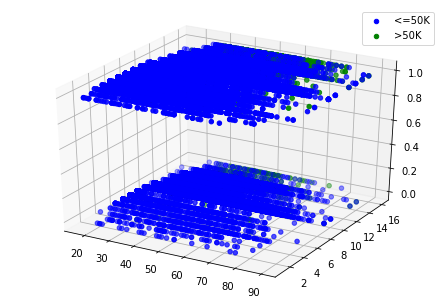

In [37]:
import matplotlib.colors as mcolors
colors = list(mcolors.BASE_COLORS.keys())

fig = plt.figure()
ax = Axes3D(fig)

labels = set(data['label'])
for idx, label in enumerate(labels):
    df2 = data[data['label'] == label]
    X = df2["age"]
    Y = df2["education_num"]
    Z = df2["sex"]
    p=ax.scatter(X, Y, Z, c=colors[idx], label=label)

plt.legend()
plt.show()

In [15]:
df = data[data["label"]=="<=50K"]
print(len( list(data[data["sex"]=="male"]) ))
print(len( list(data[data["sex"]=="female"]) ))
print(data[data["sex"]=="male"].shape)
print(data[data["sex"]=="female"].shape)
print(data[data["sex"]=="male"].shape)
print(data[data["sex"]=="female"].shape)

15
15
(30527, 15)
(14695, 15)
